In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_excel('Data Analyst Trial - Data Set.xlsx', sheet_name='sales')
calls = pd.read_excel('Data Analyst Trial - Data Set.xlsx', sheet_name='calls')
agents = pd.read_excel('Data Analyst Trial - Data Set.xlsx', sheet_name='agents')
customers = pd.read_excel('Data Analyst Trial - Data Set.xlsx', sheet_name='customers', usecols=[0,1,2,3,4,5,6,7,8,9])
markets = pd.read_excel('Data Analyst Trial - Data Set.xlsx', sheet_name='markets')

In [3]:
sales['sale_date'] = pd.to_datetime(sales['sale_date'])
calls['call_date'] = pd.to_datetime(calls['call_date'])
customers['created_at'] = pd.to_datetime(customers['created_at'])

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14172 entries, 0 to 14171
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sale_id      14172 non-null  int64         
 1   customer_id  14172 non-null  int64         
 2   sale_date    14172 non-null  datetime64[ns]
 3   amount       14172 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 443.0 KB


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175359 entries, 0 to 175358
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   call_id       175359 non-null  int64         
 1   customer_id   175359 non-null  int64         
 2   call_date     175359 non-null  datetime64[ns]
 3   disposition   175359 non-null  object        
 4   call_handler  77577 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 6.7+ MB


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     50000 non-null  int64         
 1   created_at      50000 non-null  datetime64[ns]
 2   first_name      50000 non-null  object        
 3   last_name       50000 non-null  object        
 4   address         50000 non-null  object        
 5   city            50000 non-null  object        
 6   state           50000 non-null  object        
 7   zip_code        50000 non-null  int64         
 8   market_id       50000 non-null  object        
 9   assigned_agent  50000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 3.8+ MB


In [7]:
markets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   market_id                      50 non-null     object
 1   census_name                    50 non-null     object
 2   common_name                    50 non-null     object
 3   population                     50 non-null     int64 
 4   days_on_market_median          50 non-null     int64 
 5   price_new_list_median          50 non-null     int64 
 6   price_closed_median            50 non-null     int64 
 7   listings_on_market_count       50 non-null     int64 
 8   listings_price_increase_count  50 non-null     int64 
 9   listings_price_decrease_count  50 non-null     int64 
 10  listings_closed_count          50 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 4.4+ KB


# Best Markets for Smiley
Let's look at sales volume for each of our markets a few different ways. We're going to ignore the 'markets' dataset for now, because we're assuming that is more general overall market data rather than directly revenue generating activity for Smiley.

In the sales table, we have sales for each customer ID. In the customer table, we can then link to their market via the market_id. We can then aggregate and slice across a few different dimensions to get an idea of market volumes.

First, though, it's always nice to check to make sure the keys we're choosing to join on are unique.

In [8]:
sales['customer_id'].is_unique

True

In [9]:
customers['customer_id'].is_unique

True

In [10]:
customer_sales = pd.merge(sales, customers, left_on='customer_id', right_on='customer_id', how='left')

In [11]:
customer_sales

,sale_id,customer_id,sale_date,amount,created_at,first_name,last_name,address,city,state,zip_code,market_id,assigned_agent
0,1,2,2025-01-04 12:45:00,232562,2025-01-01 02:31:00,Josephine,Darakjy,1864 Pine Ct,Phoenix,AZ,85575,phoenix_az,sofia_smith_808
1,2,3,2025-01-05 14:00:00,473272,2025-01-01 03:19:00,Art,Venere,5542 Ridge St,Tampa,FL,32138,tampa_fl,mina_carter_615
2,3,7,2025-01-13 13:01:00,280980,2025-01-01 06:21:00,Mitsue,Tollner,7445 Cedar St,Cleveland,OH,43683,cleveland_oh,arjun_ramirez_306
3,4,15,2025-01-12 14:52:00,500904,2025-01-01 08:45:00,Cammy,Albares,6236 Franklin St,Cleveland,OH,43185,cleveland_oh,ali_hall_3
4,5,17,2025-01-08 08:16:00,247848,2025-01-01 09:10:00,Meaghan,Garufi,5620 Wilson Ct,Cleveland,OH,43740,cleveland_oh,arjun_ramirez_306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14167,14168,49960,2025-11-11 12:44:00,739721,2025-11-06 13:59:00,Lucius,Spiering,1474 Cedar Dr,Chicago,IL,60946,chicago_il,jennifer_lewis_656
14168,14169,49969,2025-11-08 10:36:00,723690,2025-11-06 14:47:00,Amelia,Kimery,7162 Jackson St,Charlotte,NC,27318,charlotte_nc,michael_garcia_747
14169,14170,49974,2025-11-06 15:50:00,459705,2025-11-06 15:05:00,Kieth,Arons,3320 Elm Dr,Nashville,TN,37627,nashville_tn,mina_kim_869
14170,14171,49984,2025-11-19 09:22:00,478800,2025-11-06 15:47:00,Claud,Grengs,8541 Monroe Ln,Las Vegas,NV,89331,las_vegas_nv,latoya_robinson_601


In [12]:
customer_sales.sale_date.min()

Timestamp('2025-01-01 11:54:00')

In [13]:
customer_sales.created_at.min()

Timestamp('2025-01-01 02:31:00')

### Now we're going to create daily sales for plotting, add a 7 day moving average to smooth the curves, and look at our top 5 markets by sales volume

In [14]:
# I used GPT here to help me create this table correctly
daily_sales = (customer_sales
    .set_index('sale_date')
    .groupby('market_id')
    .resample('D')['amount'] # this part specifically, the "resample('D')"
    .sum()
    .reset_index()
)

In [15]:
# And to get the lambda function working here
daily_sales['7_day_moving_avg'] = (
    daily_sales
    .groupby('market_id')['amount']
    .transform(lambda x: x.rolling(7, min_periods=1).mean()) # This bad boy 
)

# After doing some of the plotting I noticed the 7 day is still noisy, so seeing what a month looks like
daily_sales['30_day_moving_avg'] = (
    daily_sales
    .groupby('market_id')['amount']
    .transform(lambda x: x.rolling(30, min_periods=1).mean()) # This bad boy 
)

In [16]:
daily_sales

,market_id,sale_date,amount,7_day_moving_avg,30_day_moving_avg
0,atlanta_ga,2025-01-03,425880,425880.000000,425880.000000
1,atlanta_ga,2025-01-04,0,212940.000000,212940.000000
2,atlanta_ga,2025-01-05,0,141960.000000,141960.000000
3,atlanta_ga,2025-01-06,874672,325138.000000,325138.000000
4,atlanta_ga,2025-01-07,0,260110.400000,260110.400000
...,...,...,...,...,...
15699,washington_dc,2025-11-11,0,579032.428571,617579.733333
15700,washington_dc,2025-11-12,722755,503965.857143,641671.566667
15701,washington_dc,2025-11-13,0,438522.285714,641671.566667
15702,washington_dc,2025-11-14,0,438522.285714,577184.200000


In [17]:
top_markets = (
    daily_sales
    .groupby('market_id')['amount']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
top_markets

market_id
detroit_mi         172720542
seattle_wa         158307881
grand_rapids_mi    156174194
jacksonville_fl    150300813
miami_fl           149932321
Name: amount, dtype: int64

In [18]:
top_market_daily_sales = pd.merge(top_markets, daily_sales, on = 'market_id', how = 'inner')

In [19]:
top_market_daily_sales

,market_id,amount_x,sale_date,amount_y,7_day_moving_avg,30_day_moving_avg
0,detroit_mi,172720542,2025-01-08,306251,306251.000000,306251.000000
1,detroit_mi,172720542,2025-01-09,908403,607327.000000,607327.000000
2,detroit_mi,172720542,2025-01-10,0,404884.666667,404884.666667
3,detroit_mi,172720542,2025-01-11,447920,415643.500000,415643.500000
4,detroit_mi,172720542,2025-01-12,436576,419830.000000,419830.000000
...,...,...,...,...,...,...
1571,miami_fl,149932321,2025-11-14,0,320954.285714,568737.233333
1572,miami_fl,149932321,2025-11-15,0,320954.285714,531004.833333
1573,miami_fl,149932321,2025-11-16,0,252236.571429,531004.833333
1574,miami_fl,149932321,2025-11-17,0,92785.000000,531004.833333


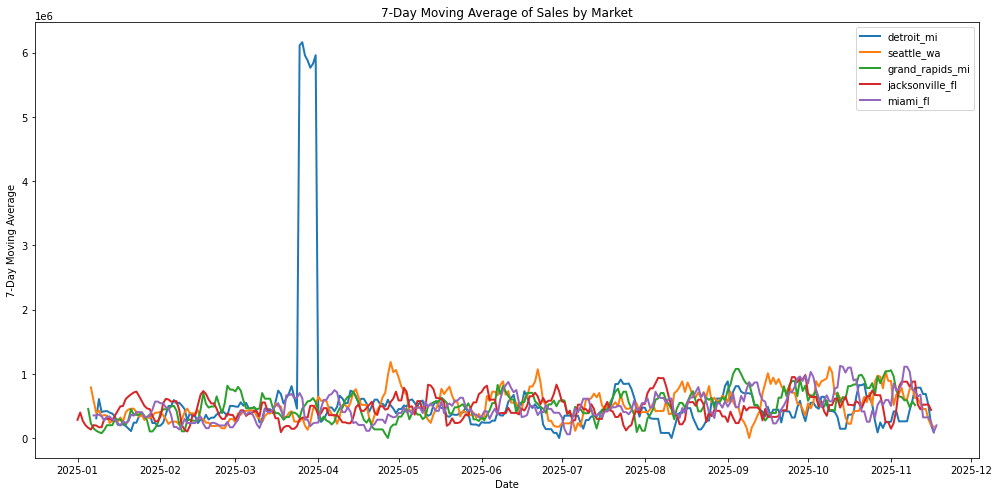

In [20]:
# Used GPT here to help me plot this
plt.figure(figsize=(14, 7))

for market in top_market_daily_sales['market_id'].unique():
    sub = top_market_daily_sales[top_market_daily_sales['market_id'] == market].sort_values('sale_date')
    plt.plot(
        sub['sale_date'],
        sub['7_day_moving_avg'],
        label=f"{market}",
        linewidth=2
    )

plt.title("7-Day Moving Average of Sales by Market")
plt.xlabel("Date")
plt.ylabel("7-Day Moving Average")
plt.legend()
plt.tight_layout()
plt.show()

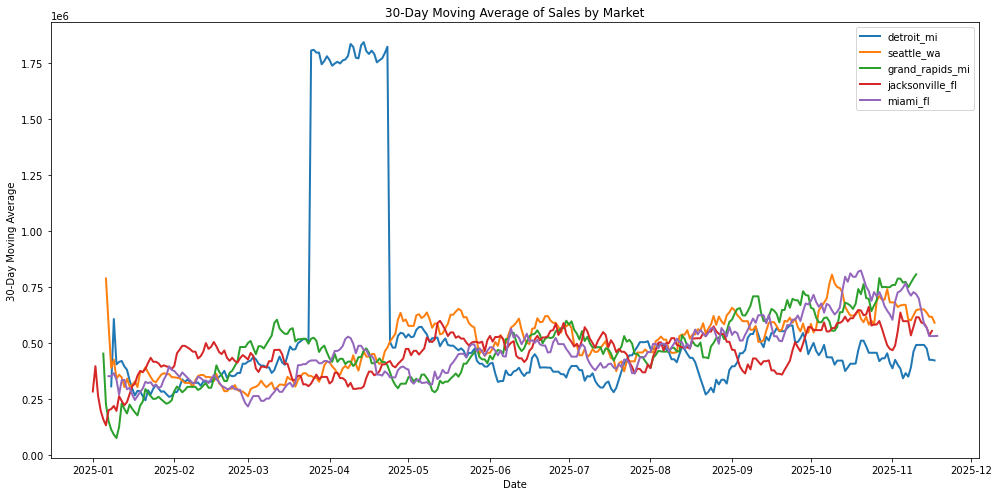

In [21]:
plt.figure(figsize=(14, 7))

for market in top_market_daily_sales['market_id'].unique():
    sub = top_market_daily_sales[top_market_daily_sales['market_id'] == market].sort_values('sale_date')
    plt.plot(
        sub['sale_date'],
        sub['30_day_moving_avg'],
        label=f"{market}",
        linewidth=2
    )

plt.title("30-Day Moving Average of Sales by Market")
plt.xlabel("Date")
plt.ylabel("30-Day Moving Average")
plt.legend()
plt.tight_layout()
plt.show()

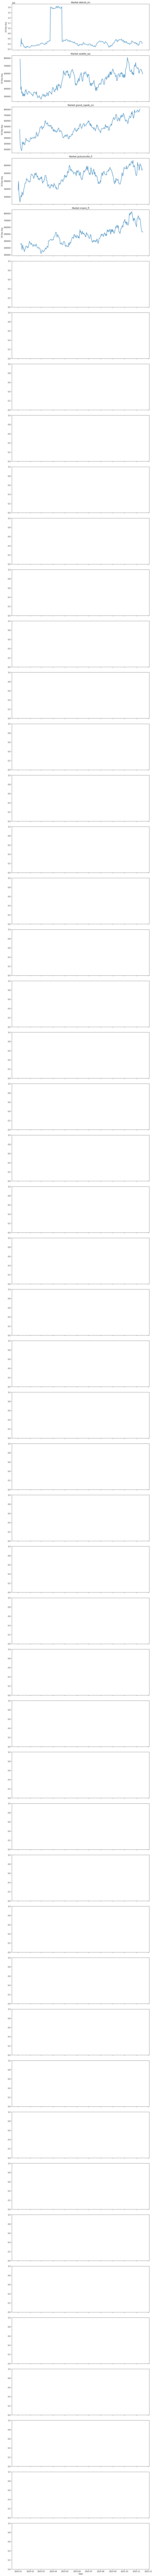

In [22]:
# And these, because I notice immediately we have an outlier in Detroit, so I want to look at each plot individually
top_10_markets = top_market_daily_sales['market_id'].unique()
n = len(markets)

fig, axes = plt.subplots(n, 1, figsize=(12, 4*n), sharex=True)

for ax, market in zip(axes, top_10_markets):
    sub = top_market_daily_sales[top_market_daily_sales['market_id'] == market].sort_values('sale_date')
    ax.plot(sub['sale_date'], sub['30_day_moving_avg'], linewidth=2)
    ax.set_title(f"Market {market}")
    ax.set_ylabel("30-Day Avg")

plt.xlabel("Date")
plt.tight_layout()
plt.show()


## What happens if we remove the detroit outlier?

In [23]:
detroit_df = daily_sales[daily_sales['market_id'] == 'detroit_mi'].copy()

In [24]:
detroit_df.amount.max()

39592800

In [25]:
customer_sales.amount.max()

39592800

In [26]:
# Janky way to remove the outlier, I'd do this much cleaner in SQL but here we are in a juptyer notebook
customer_sales = customer_sales[customer_sales['amount'] != customer_sales['amount'].max()]

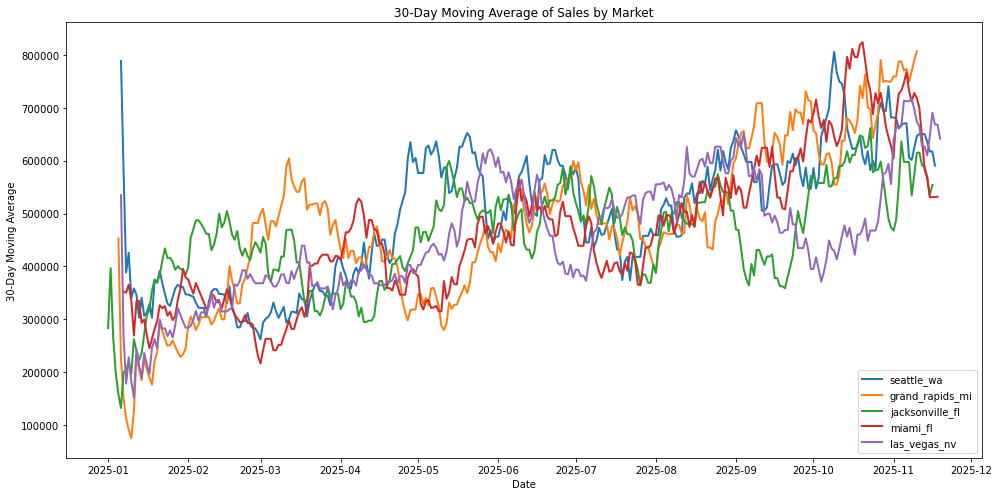

In [27]:
# Let's do this again
daily_sales = (customer_sales
    .set_index('sale_date')
    .groupby('market_id')
    .resample('D')['amount'] 
    .sum()
    .reset_index()
)
daily_sales['7_day_moving_avg'] = (
    daily_sales
    .groupby('market_id')['amount']
    .transform(lambda x: x.rolling(7, min_periods=1).mean())
)

daily_sales['30_day_moving_avg'] = (
    daily_sales
    .groupby('market_id')['amount']
    .transform(lambda x: x.rolling(30, min_periods=1).mean()) 
)
top_markets = (
    daily_sales
    .groupby('market_id')['amount']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
top_market_daily_sales = pd.merge(top_markets, daily_sales, on = 'market_id', how = 'inner')

plt.figure(figsize=(14, 7))

for market in top_market_daily_sales['market_id'].unique():
    sub = top_market_daily_sales[top_market_daily_sales['market_id'] == market].sort_values('sale_date')
    plt.plot(
        sub['sale_date'],
        sub['30_day_moving_avg'],
        label=f"{market}",
        linewidth=2
    )

plt.title("30-Day Moving Average of Sales by Market")
plt.xlabel("Date")
plt.ylabel("30-Day Moving Average")
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
top_markets

market_id
seattle_wa         158307881
grand_rapids_mi    156174194
jacksonville_fl    150300813
miami_fl           149932321
las_vegas_nv       149920376
Name: amount, dtype: int64

# A final look at markets: Let's look at the total sales trend on a 30 day moving average basis for ALL markets, and then we can move on


In [28]:
sales

,sale_id,customer_id,sale_date,amount
0,1,2,2025-01-04 12:45:00,232562
1,2,3,2025-01-05 14:00:00,473272
2,3,7,2025-01-13 13:01:00,280980
3,4,15,2025-01-12 14:52:00,500904
4,5,17,2025-01-08 08:16:00,247848
...,...,...,...,...
14167,14168,49960,2025-11-11 12:44:00,739721
14168,14169,49969,2025-11-08 10:36:00,723690
14169,14170,49974,2025-11-06 15:50:00,459705
14170,14171,49984,2025-11-19 09:22:00,478800


In [29]:
# use the dataset w/ the dropped outlier
sales_agg = (customer_sales
    .set_index('sale_date')
    .resample('D')['amount'] 
    .sum()
    .reset_index()
            )
sales_agg['30_day_moving_avg'] = (
    sales_agg['amount'].rolling(30, min_periods=1).mean()
)

In [30]:
sales_agg

,sale_date,amount,30_day_moving_avg
0,2025-01-01,283363,2.833630e+05
1,2025-01-02,1504714,8.940385e+05
2,2025-01-03,906913,8.983300e+05
3,2025-01-04,5067123,1.940528e+06
4,2025-01-05,4163383,2.385099e+06
...,...,...,...
322,2025-11-19,1622784,2.103483e+07
323,2025-11-20,1867568,2.019657e+07
324,2025-11-21,0,1.917326e+07
325,2025-11-22,502095,1.810396e+07


Text(0, 0.5, '30-Day Moving Average')

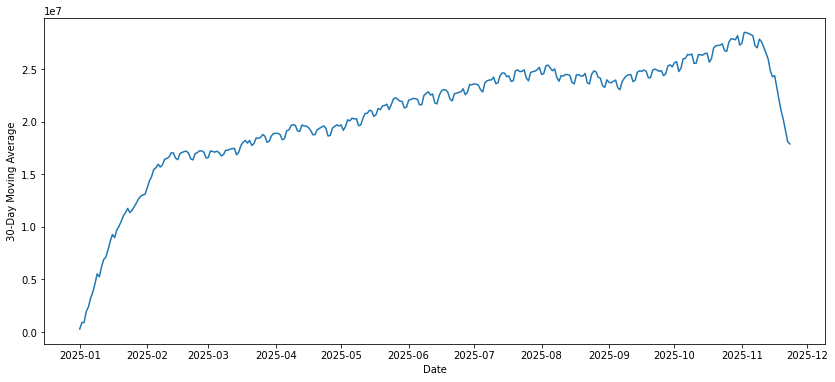

In [31]:
plt.figure(figsize=(14, 6))
plt.plot(sales_agg['sale_date'], sales_agg['30_day_moving_avg'])
plt.xlabel("Date")
plt.ylabel("30-Day Moving Average")

# Woo! Line go up and to the right!! Now let's switch gears and take a look at the best agents

In [32]:
agents

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024
0,hiroshi_thompson_560,Hiroshi,Thompson,cleveland_oh,69,131,18,18,5.0,4.11
1,ali_nelson_663,Ali,Nelson,phoenix_az,24,226,4,32,1.0,2.94
2,kwame_singh_576,Kwame,Singh,salt_lake_city_ut,141,73,16,25,6.0,2.58
3,hao_jackson_527,Hao,Jackson,st_louis_mo,7,272,1,40,6.0,2.00
4,camila_mohamed_261,Camila,Mohamed,kansas_city_mo,132,35,14,10,1.0,2.74
...,...,...,...,...,...,...,...,...,...,...
995,daniel_carter_403,Daniel,Carter,providence_ri,110,99,20,12,6.0,3.66
996,layla_lewis_677,Layla,Lewis,dallas_tx,46,6,10,2,1.0,2.92
997,asha_jones_31,Asha,Jones,st_louis_mo,113,27,29,9,5.0,2.65
998,keisha_hassan_884,Keisha,Hassan,cincinnati_oh,5,137,1,34,4.0,2.57


## Looks like we have some good data. Things I'm interested in off the bat are, in some semblance of an order, the percentage of closings, the number of closings, and the split between buying and selling. 

In [33]:
agents.agent_id.is_unique

True

In [34]:
agents['buyer_close_pct'] = agents['buyer_closes_2024'] / agents['buyer_customers_sent_2024']
agents['seller_close_pct'] = agents['seller_closes_2024'] / agents['seller_customers_sent_2024']
agents['total_close_pct'] = (agents['buyer_closes_2024'] + agents['seller_closes_2024']) / (agents['buyer_customers_sent_2024'] + agents['seller_customers_sent_2024'])
agents['total_closes'] = (agents['buyer_closes_2024'] + agents['seller_closes_2024'])

In [35]:
agents

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024,buyer_close_pct,seller_close_pct,total_close_pct,total_closes
0,hiroshi_thompson_560,Hiroshi,Thompson,cleveland_oh,69,131,18,18,5.0,4.11,0.260870,0.137405,0.180000,36
1,ali_nelson_663,Ali,Nelson,phoenix_az,24,226,4,32,1.0,2.94,0.166667,0.141593,0.144000,36
2,kwame_singh_576,Kwame,Singh,salt_lake_city_ut,141,73,16,25,6.0,2.58,0.113475,0.342466,0.191589,41
3,hao_jackson_527,Hao,Jackson,st_louis_mo,7,272,1,40,6.0,2.00,0.142857,0.147059,0.146953,41
4,camila_mohamed_261,Camila,Mohamed,kansas_city_mo,132,35,14,10,1.0,2.74,0.106061,0.285714,0.143713,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,daniel_carter_403,Daniel,Carter,providence_ri,110,99,20,12,6.0,3.66,0.181818,0.121212,0.153110,32
996,layla_lewis_677,Layla,Lewis,dallas_tx,46,6,10,2,1.0,2.92,0.217391,0.333333,0.230769,12
997,asha_jones_31,Asha,Jones,st_louis_mo,113,27,29,9,5.0,2.65,0.256637,0.333333,0.271429,38
998,keisha_hassan_884,Keisha,Hassan,cincinnati_oh,5,137,1,34,4.0,2.57,0.200000,0.248175,0.246479,35


## Top 10 agents by total closes

In [36]:
agents.sort_values('total_closes', ascending = False).head(10)

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024,buyer_close_pct,seller_close_pct,total_close_pct,total_closes
420,hassan_white_249,Hassan,White,las_vegas_nv,185,304,30,50,14.0,3.29,0.162162,0.164474,0.163599,80
476,robert_adams_868,Robert,Adams,fresno_ca,201,316,29,49,15.0,2.65,0.144279,0.155063,0.150870,78
17,yuki_ali_72,Yuki,Ali,fresno_ca,167,231,28,49,11.0,3.44,0.167665,0.212121,0.193467,77
142,jamal_thompson_459,Jamal,Thompson,kansas_city_mo,186,456,28,49,15.0,2.87,0.150538,0.107456,0.119938,77
769,kenji_parker_198,Kenji,Parker,buffalo_ny,190,236,30,47,9.0,2.61,0.157895,0.199153,0.180751,77
544,mina_mohamed_5,Mina,Mohamed,denver_co,262,294,30,47,12.0,2.66,0.114504,0.159864,0.138489,77
800,jessica_hall_530,Jessica,Hall,phoenix_az,265,180,28,49,6.0,2.57,0.105660,0.272222,0.173034,77
102,latoya_lewis_862,Latoya,Lewis,denver_co,288,405,29,48,6.0,3.60,0.100694,0.118519,0.111111,77
157,michael_hall_387,Michael,Hall,portland_or,142,384,29,47,3.0,2.30,0.204225,0.122396,0.144487,76
474,priya_tran_39,Priya,Tran,memphis_tn,199,216,29,47,8.0,2.61,0.145729,0.217593,0.183133,76


## Top 10 agents by total close percentage

In [37]:
agents.sort_values('total_close_pct', ascending=False).head(10)

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024,buyer_close_pct,seller_close_pct,total_close_pct,total_closes
447,miguel_johnson_725,Miguel,Johnson,nashville_tn,6,92,1,42,2.0,4.00,0.166667,0.456522,0.438776,43
316,isabella_hill_209,Isabella,Hill,grand_rapids_mi,8,79,1,35,7.0,4.09,0.125000,0.443038,0.413793,36
292,raj_hill_659,Raj,Hill,raleigh_nc,12,105,3,43,9.0,4.84,0.250000,0.409524,0.393162,46
459,miguel_clark_518,Miguel,Clark,jacksonville_fl,19,59,2,28,4.0,2.32,0.105263,0.474576,0.384615,30
812,mina_johnson_715,Mina,Johnson,cincinnati_oh,8,65,1,27,5.0,4.16,0.125000,0.415385,0.383562,28
921,emily_hernandez_789,Emily,Hernandez,indianapolis_in,100,75,28,37,10.0,2.67,0.280000,0.493333,0.371429,65
850,carlos_young_28,Carlos,Young,riverside_ca,99,101,30,44,7.0,4.27,0.303030,0.435644,0.370000,74
239,patricia_young_347,Patricia,Young,dallas_tx,69,91,22,35,11.0,2.40,0.318841,0.384615,0.356250,57
637,william_king_267,William,King,seattle_wa,47,60,11,27,4.0,4.48,0.234043,0.450000,0.355140,38
894,lucia_king_442,Lucia,King,louisville_ky,22,29,7,11,2.0,4.71,0.318182,0.379310,0.352941,18


## Top 10 selling agents by closes and percent

In [38]:
agents.sort_values('seller_closes_2024', ascending=False).head(10)

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024,buyer_close_pct,seller_close_pct,total_close_pct,total_closes
353,jose_hernandez_319,Jose,Hernandez,austin_tx,105,313,13,50,7.0,2.30,0.123810,0.159744,0.150718,63
154,isabella_ali_502,Isabella,Ali,cleveland_oh,61,387,9,50,3.0,2.26,0.147541,0.129199,0.131696,59
809,amanda_young_904,Amanda,Young,riverside_ca,91,139,21,50,9.0,3.45,0.230769,0.359712,0.308696,71
805,matthew_garcia_514,Matthew,Garcia,houston_tx,26,471,3,50,1.0,3.57,0.115385,0.106157,0.106640,53
636,sofia_hall_478,Sofia,Hall,san_francisco_ca,64,404,13,50,5.0,4.59,0.203125,0.123762,0.134615,63
29,ebony_nelson_385,Ebony,Nelson,virginia_beach_va,46,290,6,50,8.0,4.48,0.130435,0.172414,0.166667,56
131,hiroshi_thompson_32,Hiroshi,Thompson,atlanta_ga,36,141,9,50,5.0,3.97,0.250000,0.354610,0.333333,59
615,christopher_smith_733,Christopher,Smith,dallas_tx,11,251,2,50,7.0,3.88,0.181818,0.199203,0.198473,52
107,yuki_thompson_532,Yuki,Thompson,minneapolis_mn,72,349,19,50,3.0,4.45,0.263889,0.143266,0.163895,69
101,tanya_harris_873,Tanya,Harris,virginia_beach_va,39,477,5,50,1.0,3.48,0.128205,0.104822,0.106589,55


In [39]:
agents.sort_values('seller_close_pct', ascending=False).head(10)

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024,buyer_close_pct,seller_close_pct,total_close_pct,total_closes
9,malik_mitchell_314,Malik,Mitchell,detroit_mi,147,97,27,48,7.0,3.24,0.183673,0.494845,0.307377,75
446,mina_williams_449,Mina,Williams,tampa_fl,182,93,22,46,6.0,2.25,0.120879,0.494624,0.247273,68
921,emily_hernandez_789,Emily,Hernandez,indianapolis_in,100,75,28,37,10.0,2.67,0.280000,0.493333,0.371429,65
380,omar_martinez_412,Omar,Martinez,new_york_ny,195,47,27,23,7.0,3.74,0.138462,0.489362,0.206612,50
242,latoya_scott_543,Latoya,Scott,san_francisco_ca,30,33,4,16,3.0,2.41,0.133333,0.484848,0.317460,20
916,yuki_scott_414,Yuki,Scott,riverside_ca,176,27,29,13,1.0,2.89,0.164773,0.481481,0.206897,42
305,mei_thompson_435,Mei,Thompson,milwaukee_wi,88,50,18,24,4.0,2.94,0.204545,0.480000,0.304348,42
137,camila_singh_380,Camila,Singh,las_vegas_nv,150,75,17,36,7.0,3.59,0.113333,0.480000,0.235556,53
459,miguel_clark_518,Miguel,Clark,jacksonville_fl,19,59,2,28,4.0,2.32,0.105263,0.474576,0.384615,30
230,jin_harris_955,Jin,Harris,new_york_ny,123,87,22,41,7.0,3.96,0.178862,0.471264,0.300000,63


## Quick look at what agents are closing the highest number of deals as expressed as percentage of listings on that market, i.e. who is grabbing the most market share of all in each market. 

In [40]:
agents

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024,buyer_close_pct,seller_close_pct,total_close_pct,total_closes
0,hiroshi_thompson_560,Hiroshi,Thompson,cleveland_oh,69,131,18,18,5.0,4.11,0.260870,0.137405,0.180000,36
1,ali_nelson_663,Ali,Nelson,phoenix_az,24,226,4,32,1.0,2.94,0.166667,0.141593,0.144000,36
2,kwame_singh_576,Kwame,Singh,salt_lake_city_ut,141,73,16,25,6.0,2.58,0.113475,0.342466,0.191589,41
3,hao_jackson_527,Hao,Jackson,st_louis_mo,7,272,1,40,6.0,2.00,0.142857,0.147059,0.146953,41
4,camila_mohamed_261,Camila,Mohamed,kansas_city_mo,132,35,14,10,1.0,2.74,0.106061,0.285714,0.143713,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,daniel_carter_403,Daniel,Carter,providence_ri,110,99,20,12,6.0,3.66,0.181818,0.121212,0.153110,32
996,layla_lewis_677,Layla,Lewis,dallas_tx,46,6,10,2,1.0,2.92,0.217391,0.333333,0.230769,12
997,asha_jones_31,Asha,Jones,st_louis_mo,113,27,29,9,5.0,2.65,0.256637,0.333333,0.271429,38
998,keisha_hassan_884,Keisha,Hassan,cincinnati_oh,5,137,1,34,4.0,2.57,0.200000,0.248175,0.246479,35


In [41]:
markets

,market_id,census_name,common_name,population,days_on_market_median,price_new_list_median,price_closed_median,listings_on_market_count,listings_price_increase_count,listings_price_decrease_count,listings_closed_count
0,new_york_ny,"New York-Newark-Jersey City, NY-NJ Metro Area","New York, NY",19756722,58,849000,785000,36156,362,7062,13542
1,los_angeles_ca,"Los Angeles-Long Beach-Anaheim, CA Metro Area","Los Angeles, CA",13012469,55,979000,915000,18409,330,5260,6606
2,chicago_il,"Chicago-Naperville-Elgin, IL-IN Metro Area","Chicago, IL",9359555,52,369900,360000,16751,160,6308,8251
3,dallas_tx,"Dallas-Fort Worth-Arlington, TX Metro Area","Dallas, TX",7807555,64,425611,408386,29448,448,13318,6148
4,houston_tx,"Houston-Pasadena-The Woodlands, TX Metro Area","Houston, TX",7274714,60,349000,329900,33947,1304,10622,5334
5,washington_dc,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...","Washington, DC",6263796,45,585749,580748,14311,266,5198,5869
6,philadelphia_pa,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Me...","Philadelphia, PA",6241882,44,309900,280000,12052,266,4800,6519
7,atlanta_ga,"Atlanta-Sandy Springs-Roswell, GA Metro Area","Atlanta, GA",6176937,60,414900,395000,28404,462,10778,6699
8,miami_fl,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...","Miami, FL",6138876,92,590000,560000,47180,486,10914,7102
9,phoenix_az,"Phoenix-Mesa-Chandler, AZ Metro Area","Phoenix, AZ",4941206,71,490000,465000,18828,492,9428,5217


In [42]:
agent_mkt = pd.merge(agents, markets, left_on='market_id', right_on='market_id', how='left')

In [43]:
agent_mkt

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024,...,census_name,common_name,population,days_on_market_median,price_new_list_median,price_closed_median,listings_on_market_count,listings_price_increase_count,listings_price_decrease_count,listings_closed_count
0,hiroshi_thompson_560,Hiroshi,Thompson,cleveland_oh,69,131,18,18,5.0,4.11,...,"Cleveland, OH Metro Area","Cleveland, OH",2171978.0,29.0,250006.0,243539.0,3928.0,36.0,1946.0,2292.0
1,ali_nelson_663,Ali,Nelson,phoenix_az,24,226,4,32,1.0,2.94,...,"Phoenix-Mesa-Chandler, AZ Metro Area","Phoenix, AZ",4941206.0,71.0,490000.0,465000.0,18828.0,492.0,9428.0,5217.0
2,kwame_singh_576,Kwame,Singh,salt_lake_city_ut,141,73,16,25,6.0,2.58,...,"Salt Lake City-Murray, UT Metro Area","Salt Lake City, UT",1261337.0,48.0,559900.0,552000.0,3427.0,120.0,1786.0,1267.0
3,hao_jackson_527,Hao,Jackson,st_louis_mo,7,272,1,40,6.0,2.00,...,"St. Louis, MO-IL Metro Area","St. Louis, MO",2809414.0,29.0,274900.0,285000.0,6344.0,54.0,2734.0,3483.0
4,camila_mohamed_261,Camila,Mohamed,kansas_city_mo,132,35,14,10,1.0,2.74,...,"Kansas City, MO-KS Metro Area","Kansas City, MO",2202006.0,27.0,339000.0,349900.0,6602.0,150.0,2896.0,2542.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,daniel_carter_403,Daniel,Carter,providence_ri,110,99,20,12,6.0,3.66,...,"Providence-Warwick, RI-MA Metro Area","Providence, RI",1673807.0,31.0,530424.0,524062.0,2365.0,6.0,802.0,1538.0
996,layla_lewis_677,Layla,Lewis,dallas_tx,46,6,10,2,1.0,2.92,...,"Dallas-Fort Worth-Arlington, TX Metro Area","Dallas, TX",7807555.0,64.0,425611.0,408386.0,29448.0,448.0,13318.0,6148.0
997,asha_jones_31,Asha,Jones,st_louis_mo,113,27,29,9,5.0,2.65,...,"St. Louis, MO-IL Metro Area","St. Louis, MO",2809414.0,29.0,274900.0,285000.0,6344.0,54.0,2734.0,3483.0
998,keisha_hassan_884,Keisha,Hassan,cincinnati_oh,5,137,1,34,4.0,2.57,...,"Cincinnati, OH-KY-IN Metro Area","Cincinnati, OH",2255257.0,42.0,316433.0,304890.0,4347.0,34.0,2246.0,2552.0


In [44]:
agent_mkt['listings_closed_pct'] = agent_mkt['total_closes'] / agent_mkt['listings_closed_count']

In [45]:
agent_mkt.sort_values('listings_closed_pct', ascending = False).groupby('market_id').head(1)

,agent_id,first_name,last_name,market_id,buyer_customers_sent_2024,seller_customers_sent_2024,buyer_closes_2024,seller_closes_2024,customer_reviews_2024,avg_rating_2024,...,common_name,population,days_on_market_median,price_new_list_median,price_closed_median,listings_on_market_count,listings_price_increase_count,listings_price_decrease_count,listings_closed_count,listings_closed_pct
476,robert_adams_868,Robert,Adams,fresno_ca,201,316,29,49,15.0,2.65,...,"Fresno, CA",1170942.0,45.0,440850.0,437000.0,2077.0,56.0,670.0,669.0,0.116592
769,kenji_parker_198,Kenji,Parker,buffalo_ny,190,236,30,47,9.0,2.61,...,"Buffalo, NY",1161385.0,12.0,249900.0,290000.0,1475.0,24.0,490.0,1026.0,0.075049
220,juan_hill_434,Juan,Hill,san_jose_ca,119,379,26,42,9.0,4.76,...,"San Jose, CA",1969353.0,17.0,1573032.0,1632174.0,1698.0,66.0,562.0,1082.0,0.062847
119,luis_green_96,Luis,Green,richmond_va,178,316,26,49,8.0,2.60,...,"Richmond, VA",1327321.0,26.0,412545.0,395000.0,2959.0,94.0,1308.0,1336.0,0.056138
825,carlos_abdullah_801,Carlos,Abdullah,salt_lake_city_ut,145,145,28,42,3.0,2.97,...,"Salt Lake City, UT",1261337.0,48.0,559900.0,552000.0,3427.0,120.0,1786.0,1267.0,0.055249
591,lucia_martinez_1000,Lucia,Martinez,raleigh_nc,89,390,27,47,12.0,3.90,...,"Raleigh, NC",1449594.0,48.0,462900.0,437500.0,5702.0,174.0,2720.0,1412.0,0.052408
723,asha_khan_413,Asha,Khan,grand_rapids_mi,176,145,24,44,6.0,4.91,...,"Grand Rapids, MI",1154320.0,14.0,349900.0,355500.0,1905.0,8.0,1000.0,1342.0,0.050671
474,priya_tran_39,Priya,Tran,memphis_tn,199,216,29,47,8.0,2.61,...,"Memphis, TN",1341606.0,44.0,293000.0,300000.0,5002.0,56.0,2026.0,1505.0,0.050498
853,mei_gonzalez_602,Mei,Gonzalez,providence_ri,222,161,27,48,7.0,2.74,...,"Providence, RI",1673807.0,31.0,530424.0,524062.0,2365.0,6.0,802.0,1538.0,0.048765
218,tyrone_jones_289,Tyrone,Jones,louisville_ky,124,146,25,47,6.0,4.89,...,"Louisville, KY",1361847.0,44.0,299000.0,280000.0,3688.0,30.0,1792.0,1479.0,0.048682


In [48]:
top_agents_by_market = agent_mkt.sort_values('listings_closed_pct', ascending = False).groupby('market_id').head(1)

In [49]:
top_agents_by_market.to_excel('top_agents_by_market.xlsx')

# Area for growth
Let's look at call data to see where our marketing efforts might improve

In [46]:
calls.disposition.unique()

array(['Voicemail', 'Talked to Customer', 'Disconnected'], dtype=object)

## Let's look at time to close

In [88]:
sales_calls = calls.merge(sales, on='customer_id', how='left')

In [89]:
sales_calls

,call_id,customer_id,call_date,disposition,call_handler,sale_id,sale_date,amount
0,1,1,2025-01-01 00:56:00,Voicemail,NaN,NaN,NaT,NaN
1,2,1,2025-01-04 00:21:00,Voicemail,NaN,NaN,NaT,NaN
2,3,2,2025-01-01 02:31:00,Voicemail,NaN,1.0,2025-01-04 12:45:00,232562.0
3,4,2,2025-01-03 15:50:00,Voicemail,NaN,1.0,2025-01-04 12:45:00,232562.0
4,5,2,2025-01-04 12:45:00,Talked to Customer,Vivian,1.0,2025-01-04 12:45:00,232562.0
...,...,...,...,...,...,...,...,...
175354,175355,50000,2025-11-06 17:56:00,Talked to Customer,Hillary,NaN,NaT,NaN
175355,175356,50000,2025-11-10 07:58:00,Voicemail,NaN,NaN,NaT,NaN
175356,175357,50000,2025-11-13 17:30:00,Talked to Customer,Vivian,NaN,NaT,NaN
175357,175358,50000,2025-11-18 04:51:00,Voicemail,NaN,NaN,NaT,NaN


In [90]:
made_sales = sales_calls[sales_calls['sale_date'].notna()].copy()

In [91]:
made_sales

,call_id,customer_id,call_date,disposition,call_handler,sale_id,sale_date,amount
2,3,2,2025-01-01 02:31:00,Voicemail,NaN,1.0,2025-01-04 12:45:00,232562.0
3,4,2,2025-01-03 15:50:00,Voicemail,NaN,1.0,2025-01-04 12:45:00,232562.0
4,5,2,2025-01-04 12:45:00,Talked to Customer,Vivian,1.0,2025-01-04 12:45:00,232562.0
5,6,3,2025-01-01 03:19:00,Voicemail,NaN,2.0,2025-01-05 14:00:00,473272.0
6,7,3,2025-01-02 15:09:00,Talked to Customer,Geoffrey,2.0,2025-01-05 14:00:00,473272.0
...,...,...,...,...,...,...,...,...
175318,175319,49989,2025-11-06 16:03:00,Talked to Customer,Carlton,14172.0,2025-11-20 13:07:00,621920.0
175319,175320,49989,2025-11-11 06:21:00,Voicemail,NaN,14172.0,2025-11-20 13:07:00,621920.0
175320,175321,49989,2025-11-12 15:05:00,Talked to Customer,Hillary,14172.0,2025-11-20 13:07:00,621920.0
175321,175322,49989,2025-11-16 13:30:00,Talked to Customer,Phil,14172.0,2025-11-20 13:07:00,621920.0


In [92]:
first_calls = sales_calls.groupby('customer_id')['call_date'].min().reset_index()
first_calls.columns = ['customer_id', 'first_call_date']

In [93]:
sales_with_first = made_sales.merge(first_calls, on='customer_id')

In [94]:
sales_with_first

,call_id,customer_id,call_date,disposition,call_handler,sale_id,sale_date,amount,first_call_date
0,3,2,2025-01-01 02:31:00,Voicemail,NaN,1.0,2025-01-04 12:45:00,232562.0,2025-01-01 02:31:00
1,4,2,2025-01-03 15:50:00,Voicemail,NaN,1.0,2025-01-04 12:45:00,232562.0,2025-01-01 02:31:00
2,5,2,2025-01-04 12:45:00,Talked to Customer,Vivian,1.0,2025-01-04 12:45:00,232562.0,2025-01-01 02:31:00
3,6,3,2025-01-01 03:19:00,Voicemail,NaN,2.0,2025-01-05 14:00:00,473272.0,2025-01-01 03:19:00
4,7,3,2025-01-02 15:09:00,Talked to Customer,Geoffrey,2.0,2025-01-05 14:00:00,473272.0,2025-01-01 03:19:00
...,...,...,...,...,...,...,...,...,...
49734,175319,49989,2025-11-06 16:03:00,Talked to Customer,Carlton,14172.0,2025-11-20 13:07:00,621920.0,2025-11-06 16:03:00
49735,175320,49989,2025-11-11 06:21:00,Voicemail,NaN,14172.0,2025-11-20 13:07:00,621920.0,2025-11-06 16:03:00
49736,175321,49989,2025-11-12 15:05:00,Talked to Customer,Hillary,14172.0,2025-11-20 13:07:00,621920.0,2025-11-06 16:03:00
49737,175322,49989,2025-11-16 13:30:00,Talked to Customer,Phil,14172.0,2025-11-20 13:07:00,621920.0,2025-11-06 16:03:00


In [95]:
sales_with_first['days_to_close'] = (sales_with_first['sale_date'] - sales_with_first['first_call_date']).dt.days

In [96]:
sales_with_first

,call_id,customer_id,call_date,disposition,call_handler,sale_id,sale_date,amount,first_call_date,days_to_close
0,3,2,2025-01-01 02:31:00,Voicemail,NaN,1.0,2025-01-04 12:45:00,232562.0,2025-01-01 02:31:00,3
1,4,2,2025-01-03 15:50:00,Voicemail,NaN,1.0,2025-01-04 12:45:00,232562.0,2025-01-01 02:31:00,3
2,5,2,2025-01-04 12:45:00,Talked to Customer,Vivian,1.0,2025-01-04 12:45:00,232562.0,2025-01-01 02:31:00,3
3,6,3,2025-01-01 03:19:00,Voicemail,NaN,2.0,2025-01-05 14:00:00,473272.0,2025-01-01 03:19:00,4
4,7,3,2025-01-02 15:09:00,Talked to Customer,Geoffrey,2.0,2025-01-05 14:00:00,473272.0,2025-01-01 03:19:00,4
...,...,...,...,...,...,...,...,...,...,...
49734,175319,49989,2025-11-06 16:03:00,Talked to Customer,Carlton,14172.0,2025-11-20 13:07:00,621920.0,2025-11-06 16:03:00,13
49735,175320,49989,2025-11-11 06:21:00,Voicemail,NaN,14172.0,2025-11-20 13:07:00,621920.0,2025-11-06 16:03:00,13
49736,175321,49989,2025-11-12 15:05:00,Talked to Customer,Hillary,14172.0,2025-11-20 13:07:00,621920.0,2025-11-06 16:03:00,13
49737,175322,49989,2025-11-16 13:30:00,Talked to Customer,Phil,14172.0,2025-11-20 13:07:00,621920.0,2025-11-06 16:03:00,13


In [97]:
time_to_close = sales_with_first.groupby('customer_id')['days_to_close'].first()

In [98]:
time_to_close

customer_id
2         3
3         4
7        12
15       11
17        6
         ..
49960     4
49969     1
49974     0
49984    12
49989    13
Name: days_to_close, Length: 14172, dtype: int64

Text(0.5, 1.0, 'Time-to-Close Distribution')

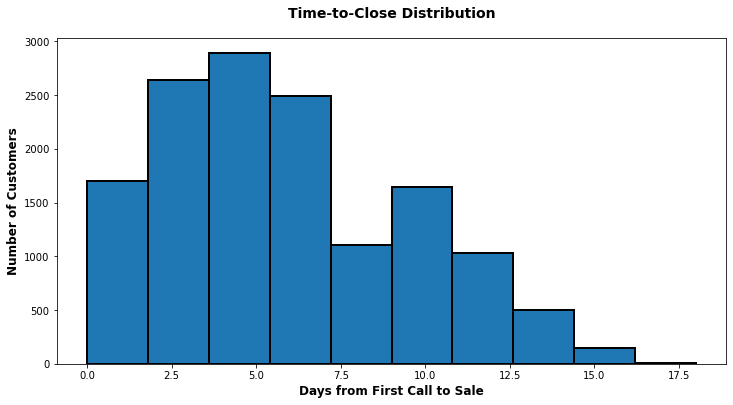

In [104]:
plt.figure(figsize=(12, 6))
plt.hist(time_to_close, edgecolor='black', linewidth=2)

plt.xlabel('Days from First Call to Sale', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.title('Time-to-Close Distribution', fontsize=14, fontweight='bold', pad=20)